# Intro to Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.1.3

1.1.3


In [3]:
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
xs_2d = iris.data[:, :2]
features = iris.feature_names[:2]

ys = iris.target

In [6]:
print(features)

['sepal length (cm)', 'sepal width (cm)']


In [7]:
xs_2d.shape

(150, 2)

In [8]:
ys.shape

(150,)

Note: Expected shapes for features and labels (target values):

#### Random selection of training and test sets

<span style="color:red">Implement your solution below</span>

In [9]:
xs_2d_train, xs_2d_test, ys_train, ys_test = train_test_split(
    xs_2d, ys, random_state=1
)

### Training

<span style="color:red">Implement your solution below</span>

In [10]:
# 1. Model choice (import)
from sklearn.naive_bayes import GaussianNB

# 2. Instantiation
model = GaussianNB()

# 3. Learn (fit) the model
model.fit(xs_2d_train, ys_train)

# 4. Predict on new data
ys_2d_pred = model.predict(xs_2d_test)

### Evaluation

[Evaluation_of_binary_classifiers](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics) ([Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))

$$\mathrm{ACC} 
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}$$

<span style="color:red">Implement your solution below</span>

In [11]:
score = metrics.accuracy_score(ys_test, ys_2d_pred)
print(f"{score :.03f}")

0.816


### Plot

In [12]:
HOP = 0.01  # Step size in the mesh

COLORS = ["green", "red", "blue"]

target_names = {k: v for k, v in enumerate(iris.target_names)}

In [13]:
def plot_decision_boundary(xs, model, colors, hop):

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, hop), np.arange(y_min, y_max, hop)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx, yy, zz, alpha=0.4, cmap=ListedColormap(colors), antialiased=True
    )

In [14]:
def plot_training_points(xs, ys, colors, features):
    for color, i, tgt_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            xs[ys == i, 0],
            xs[ys == i, 1],
            color=color,
            alpha=0.8,
            label=tgt_name,
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    plt.xlabel(features[0])
    plt.ylabel(features[1])

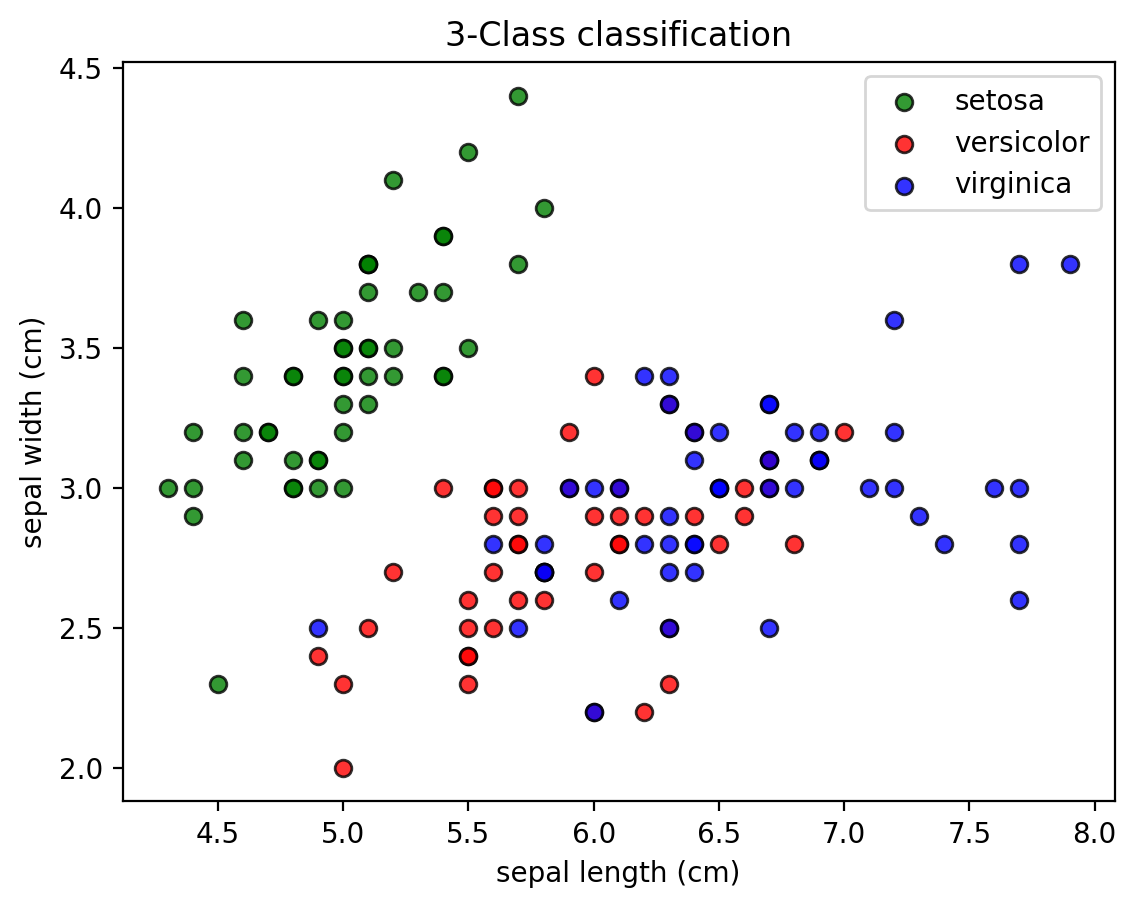

In [15]:
plot_training_points(xs_2d, ys, COLORS, features)

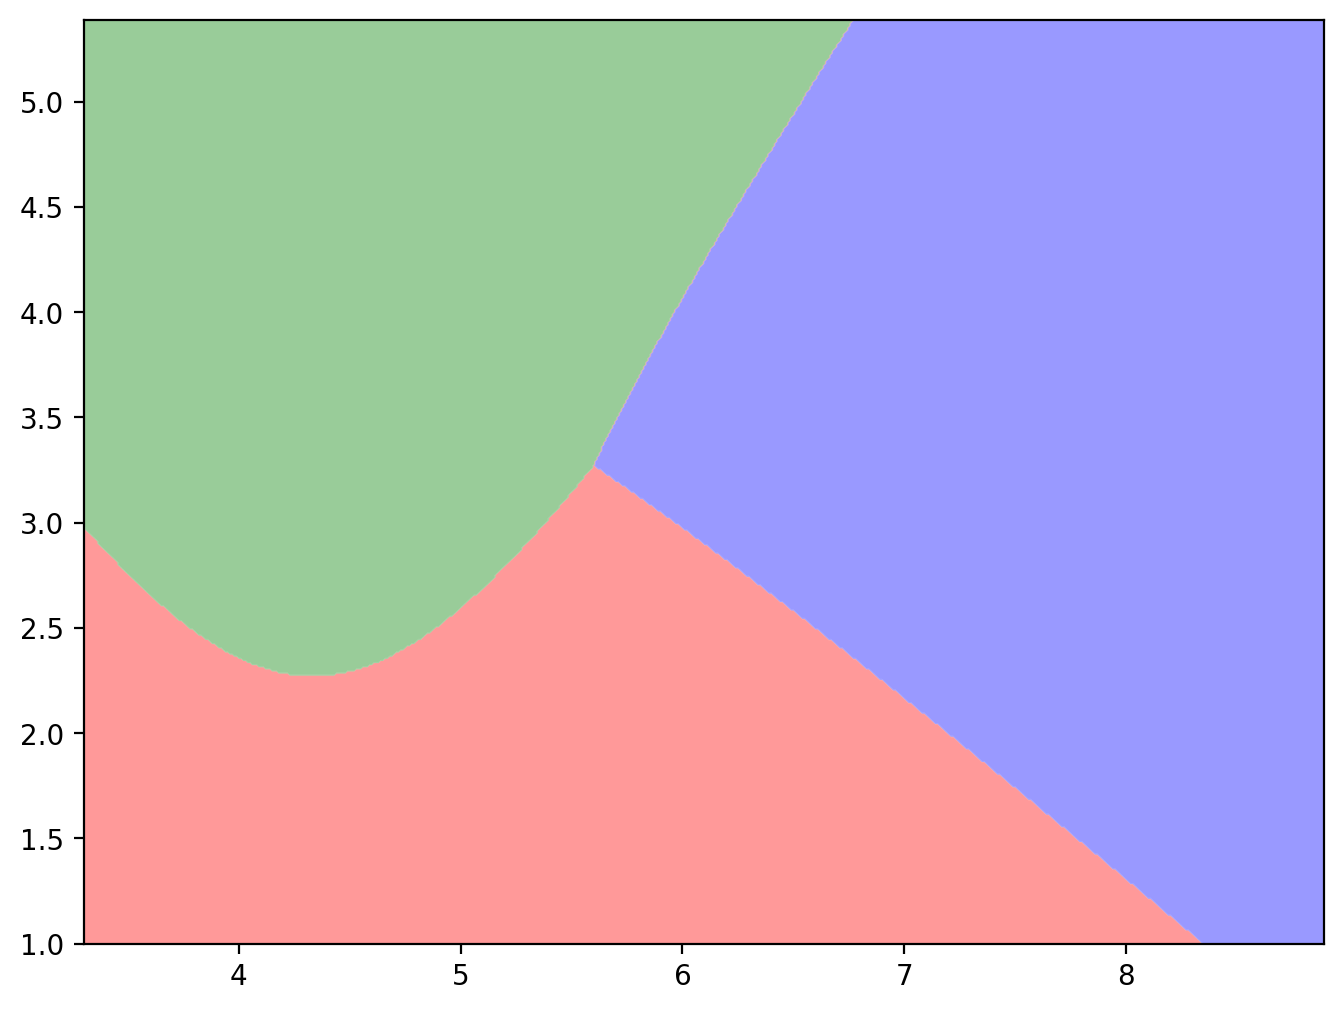

In [16]:
plot_decision_boundary(xs_2d, model, COLORS, HOP)

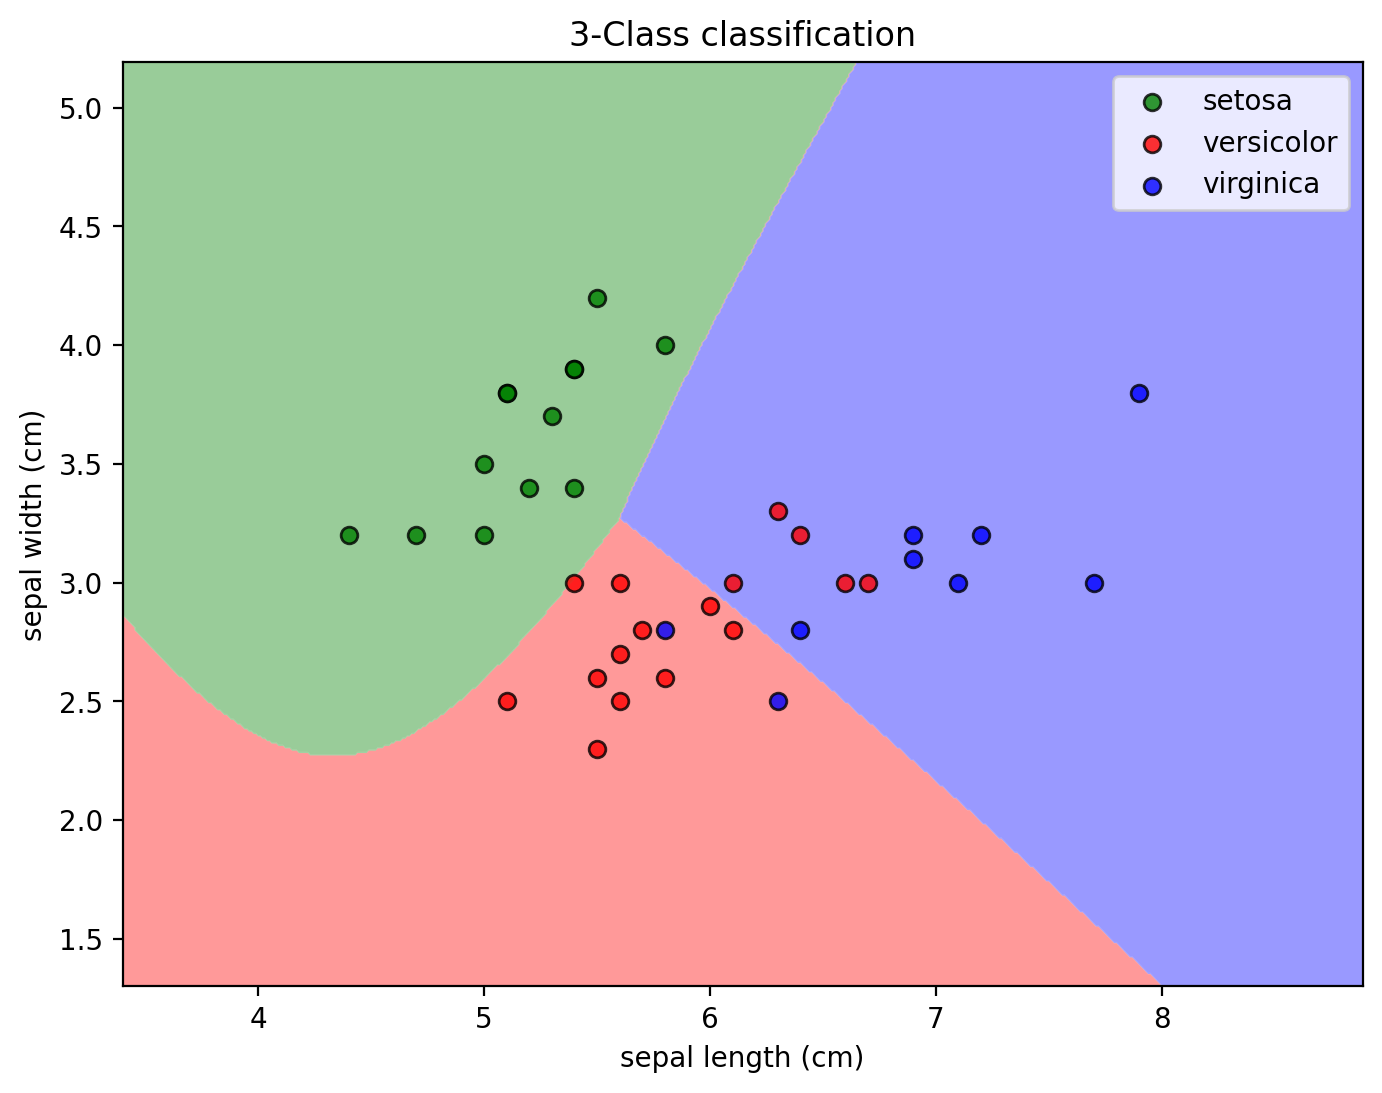

In [17]:
plot_decision_boundary(xs_2d_test, model, COLORS, HOP)
plot_training_points(xs_2d_test, ys_test, COLORS, features)

## Exercise 1

Find in the [documentation](https://scikit-learn.org/stable/supervised_learning.html) how to apply these other models to this dataset:

* *[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*
* *[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*
* *[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*
* *[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*
* *[Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*

Write the results in a table and graphically for each system using the `plot_...` [above](#Plot) functions, and give a short analysis comparing the results.

<span style="color:red">Implement your solution below</span>

In [18]:
# 1. Model choice (import)
from sklearn.linear_model import LogisticRegression

# 2. Instantiation
model = LogisticRegression(max_iter=100)

# 3. Learn (fit) the model
model.fit(xs_2d_train, ys_train)

# 4. Predict on new data
ys_2d_pred = model.predict(xs_2d_test)

In [19]:
score = metrics.accuracy_score(ys_test, ys_2d_pred)
print(f"{score :.04f}")

0.7895


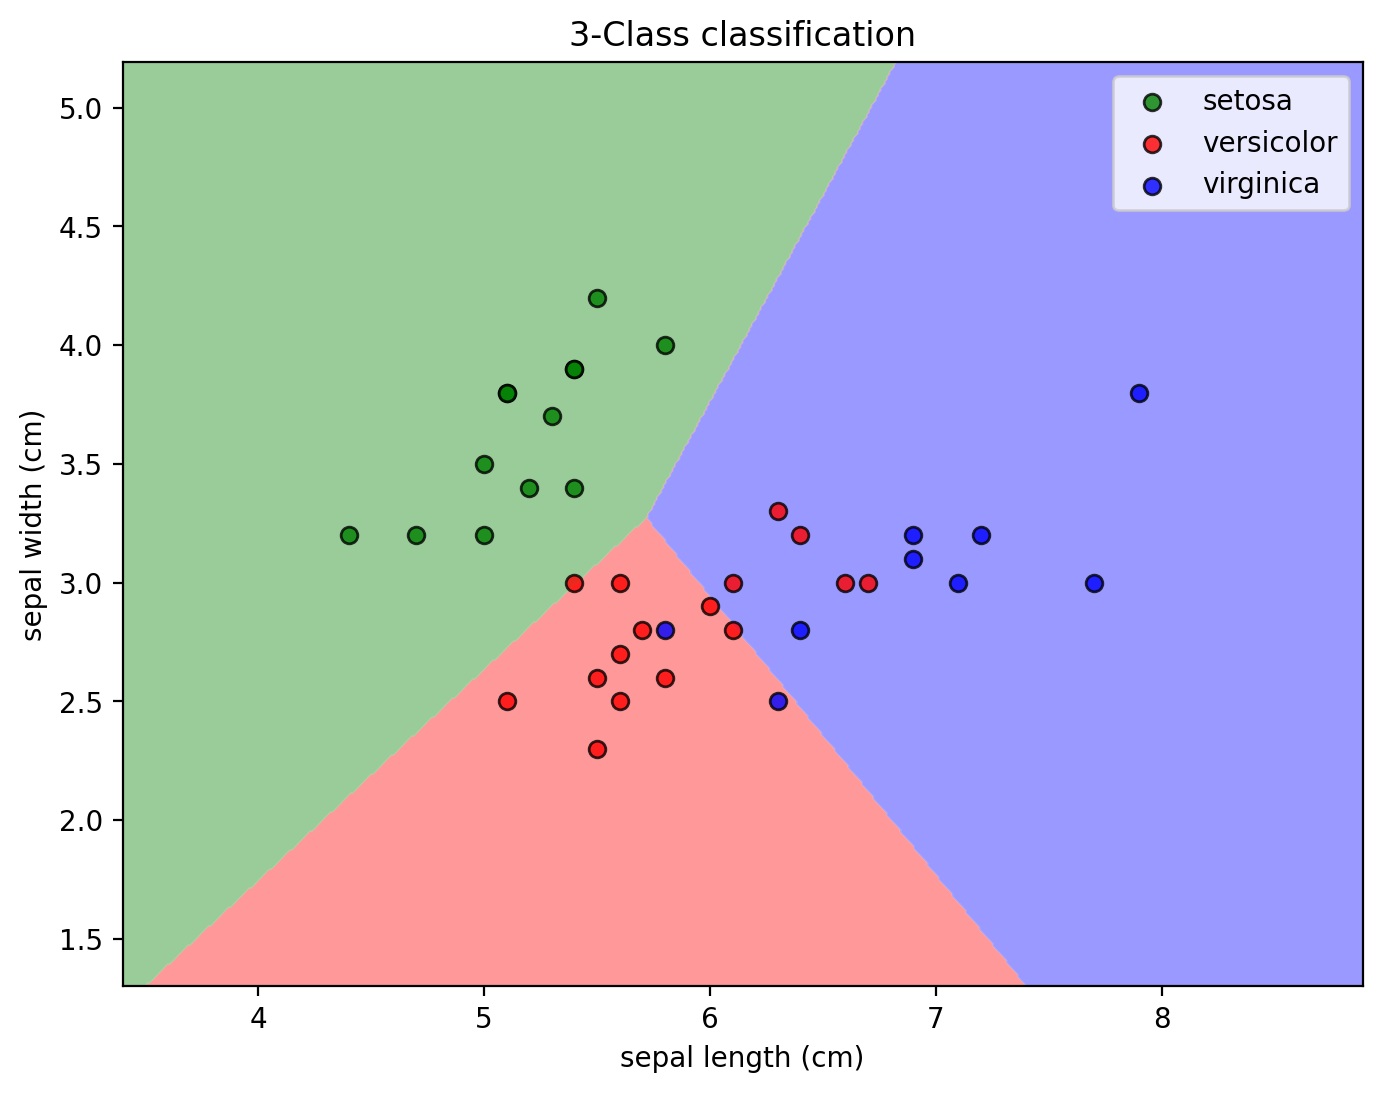

In [20]:
plot_decision_boundary(xs_2d_test, model, COLORS, HOP)
plot_training_points(xs_2d_test, ys_test, COLORS, features)

In [21]:
# 1. Model choice (import)
from sklearn.svm import SVC

# 2. Instantiation
model = SVC()

# 3. Learn (fit) the model
model.fit(xs_2d_train, ys_train)

# 4. Predict on new data
ys_2d_pred = model.predict(xs_2d_test)

In [22]:
score = metrics.accuracy_score(ys_test, ys_2d_pred)
print(f"{score :.03f}")

0.816


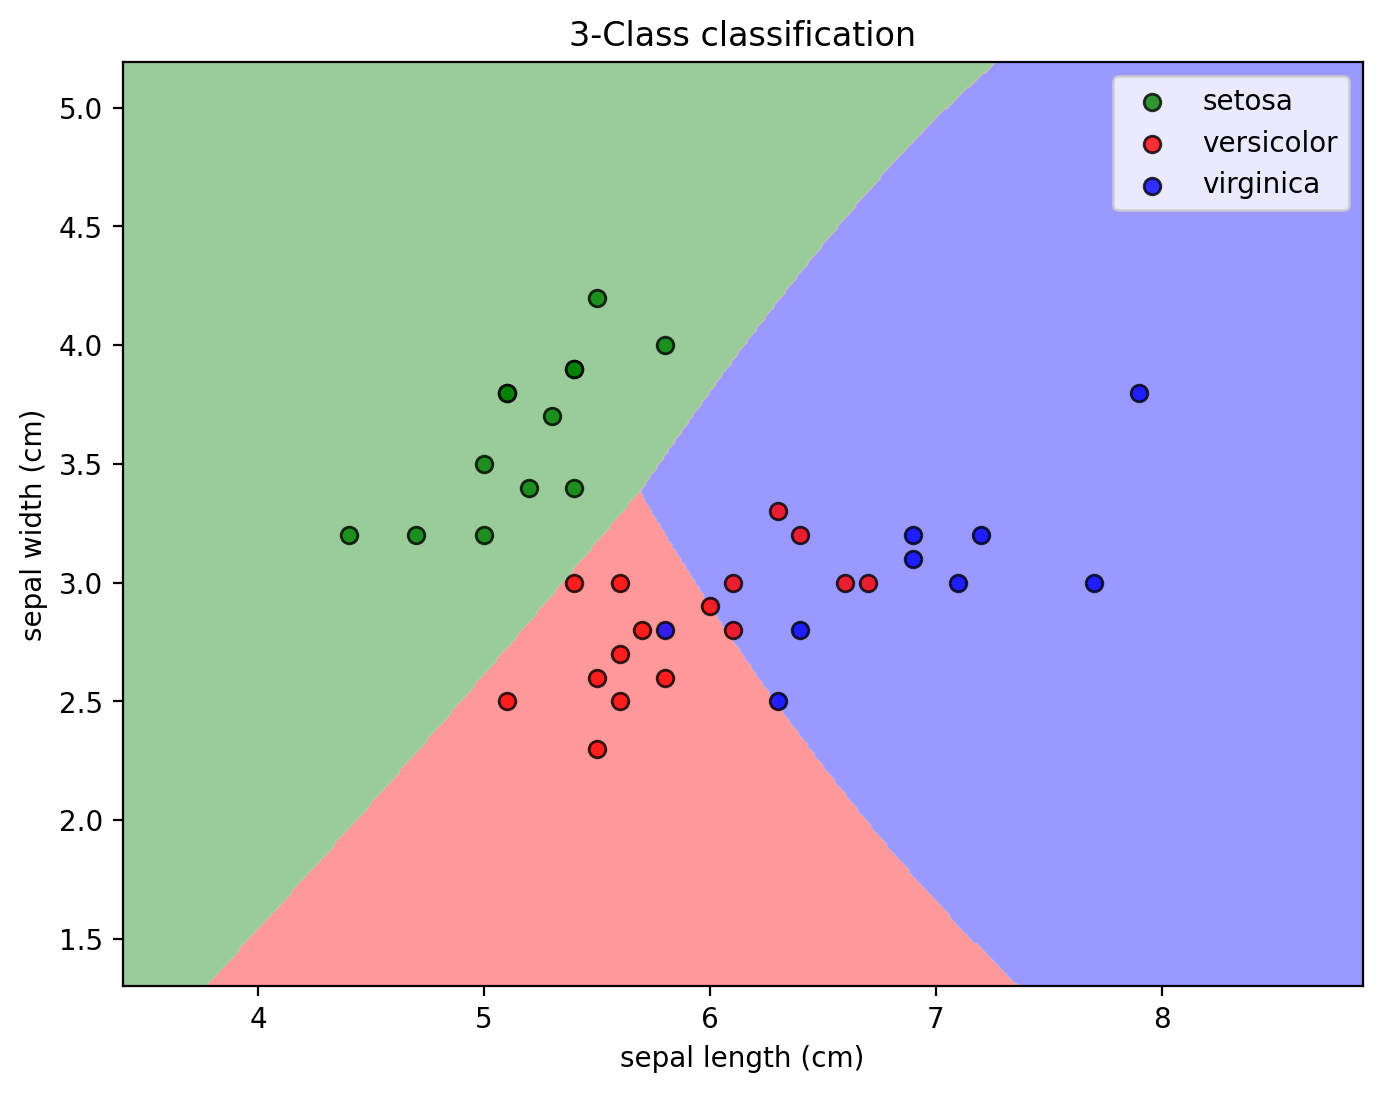

In [23]:
plot_decision_boundary(xs_2d_test, model, COLORS, HOP)
plot_training_points(xs_2d_test, ys_test, COLORS, features)

In [24]:
# 1. Model choice (import)
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiation
model = RandomForestClassifier(random_state=1)

# 3. Learn (fit) the model
model.fit(xs_2d_train, ys_train)

# 4. Predict on new data
ys_2d_pred = model.predict(xs_2d_test)

In [25]:
score = metrics.accuracy_score(ys_test, ys_2d_pred)
print(f"{score :.03f}")

0.816


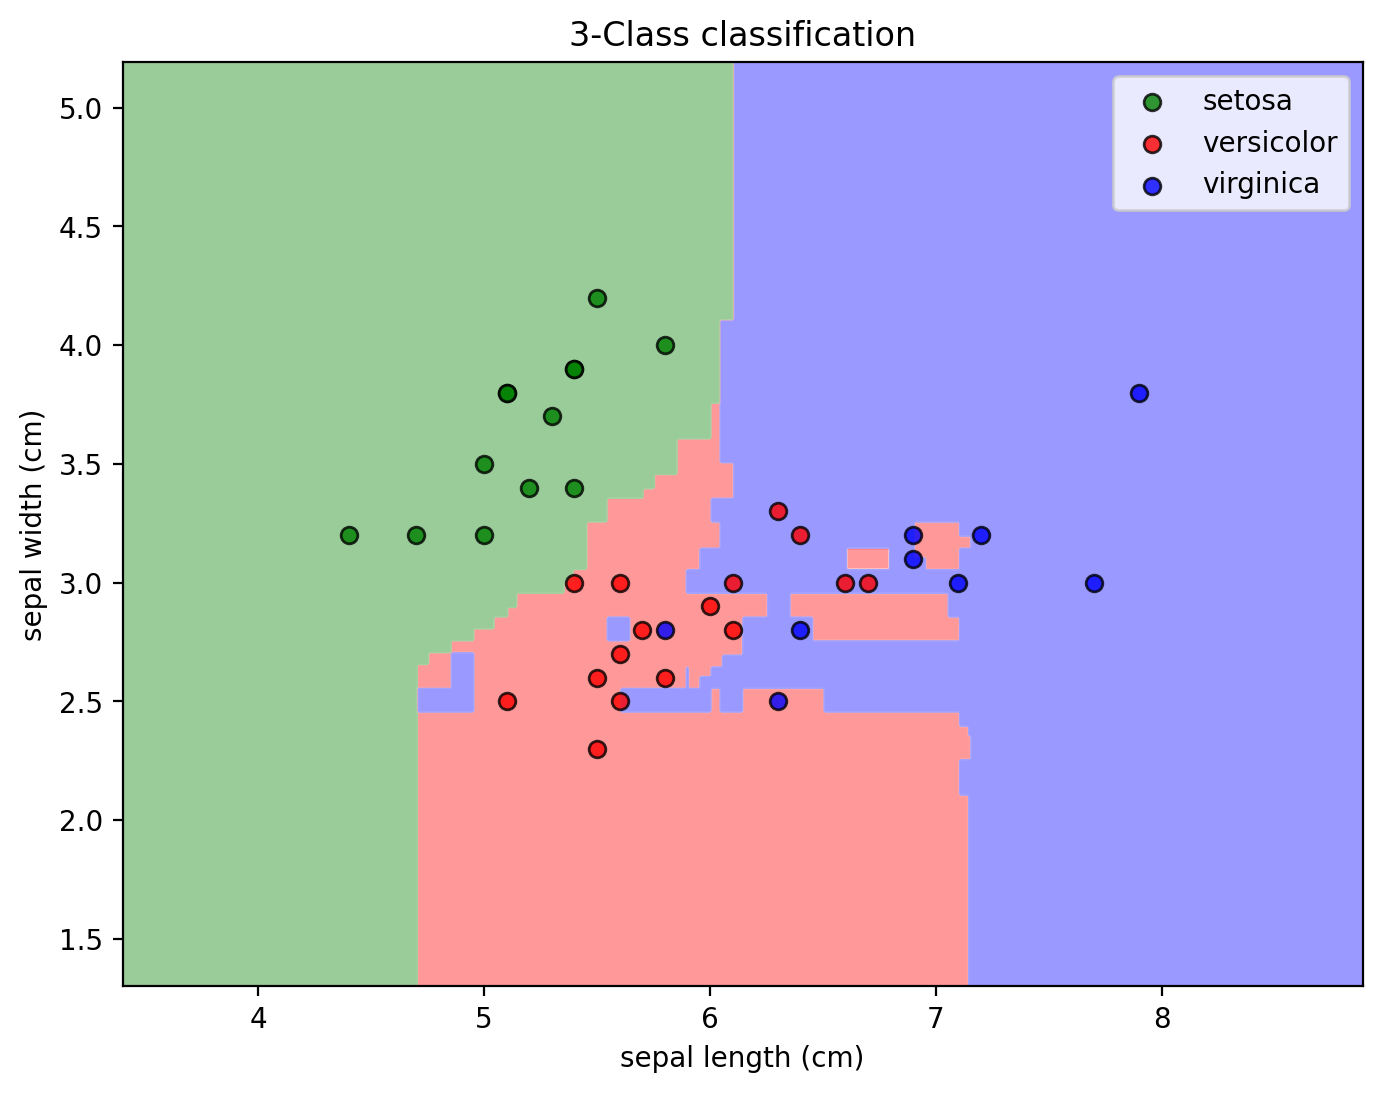

In [26]:
plot_decision_boundary(xs_2d_test, model, COLORS, HOP)
plot_training_points(xs_2d_test, ys_test, COLORS, features)

In [27]:
# 1. Model choice (import)
from sklearn.tree import DecisionTreeClassifier

# 2. Instantiation
model = DecisionTreeClassifier()

# 3. Learn (fit) the model
model.fit(xs_2d_train, ys_train)

# 4. Predict on new data
ys_2d_pred = model.predict(xs_2d_test)

In [28]:
score = metrics.accuracy_score(ys_test, ys_2d_pred)
print(f"{score :.03f}")

0.632


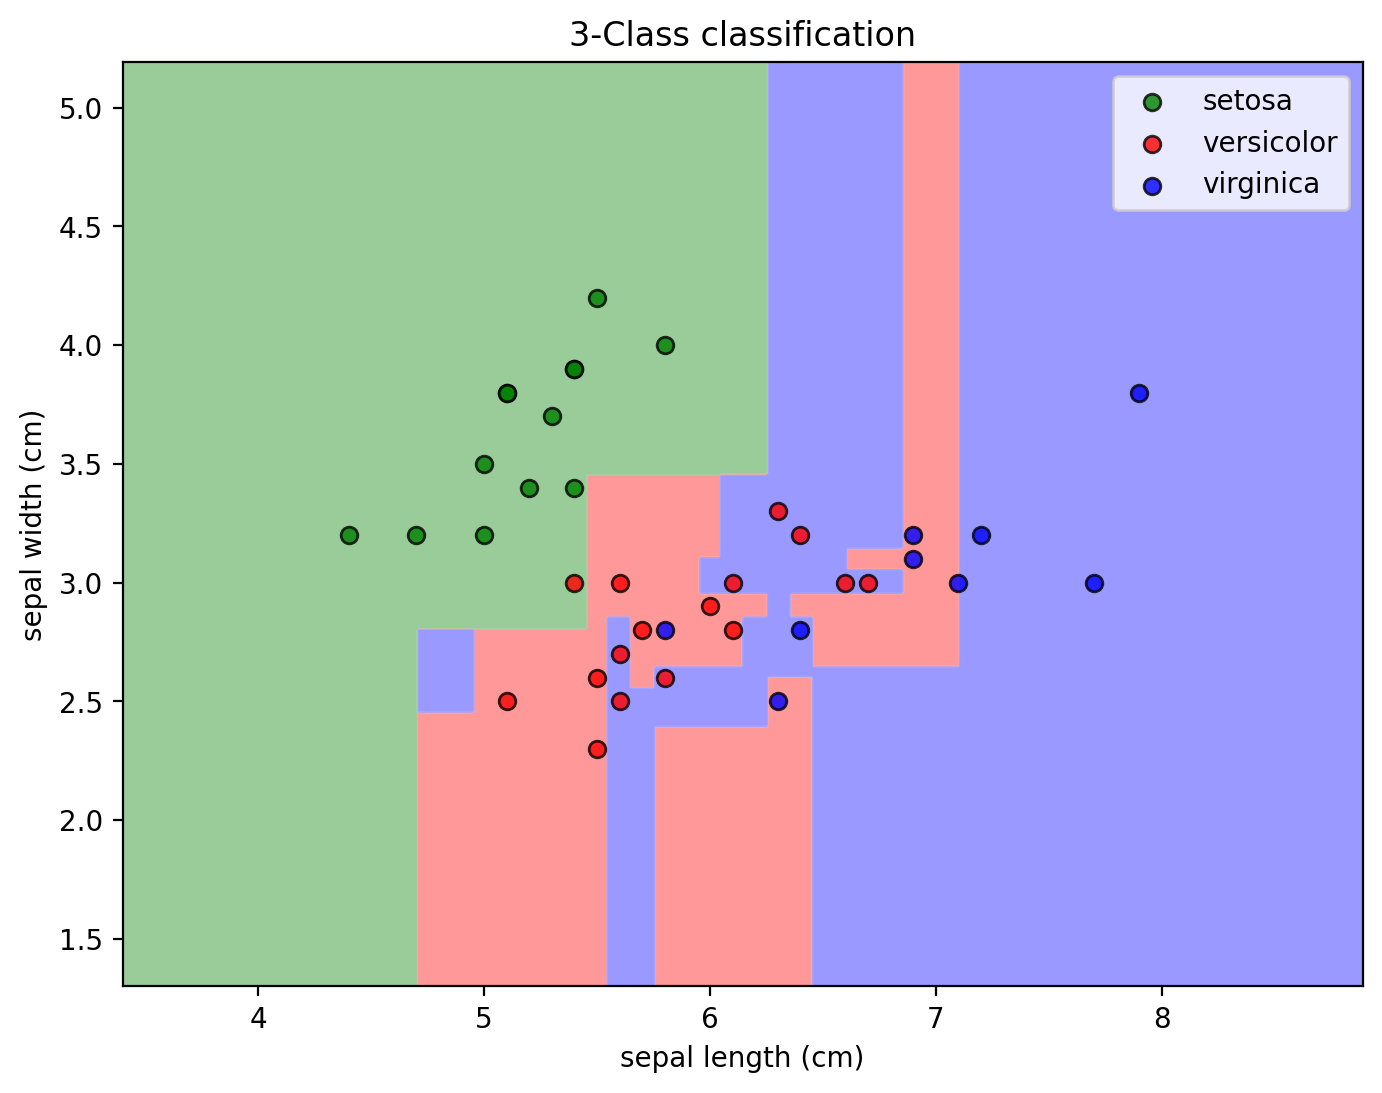

In [29]:
plot_decision_boundary(xs_2d_test, model, COLORS, HOP)
plot_training_points(xs_2d_test, ys_test, COLORS, features)

In [30]:
# 1. Model choice (import)
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiation
model = RandomForestClassifier(random_state=1)

# 3. Learn (fit) the model
model.fit(xs_2d_train, ys_train)

# 4. Predict on new data
ys_2d_pred = model.predict(xs_2d_test)

In [31]:
score = metrics.accuracy_score(ys_test, ys_2d_pred)
print(f"{score :.03f}")

0.816


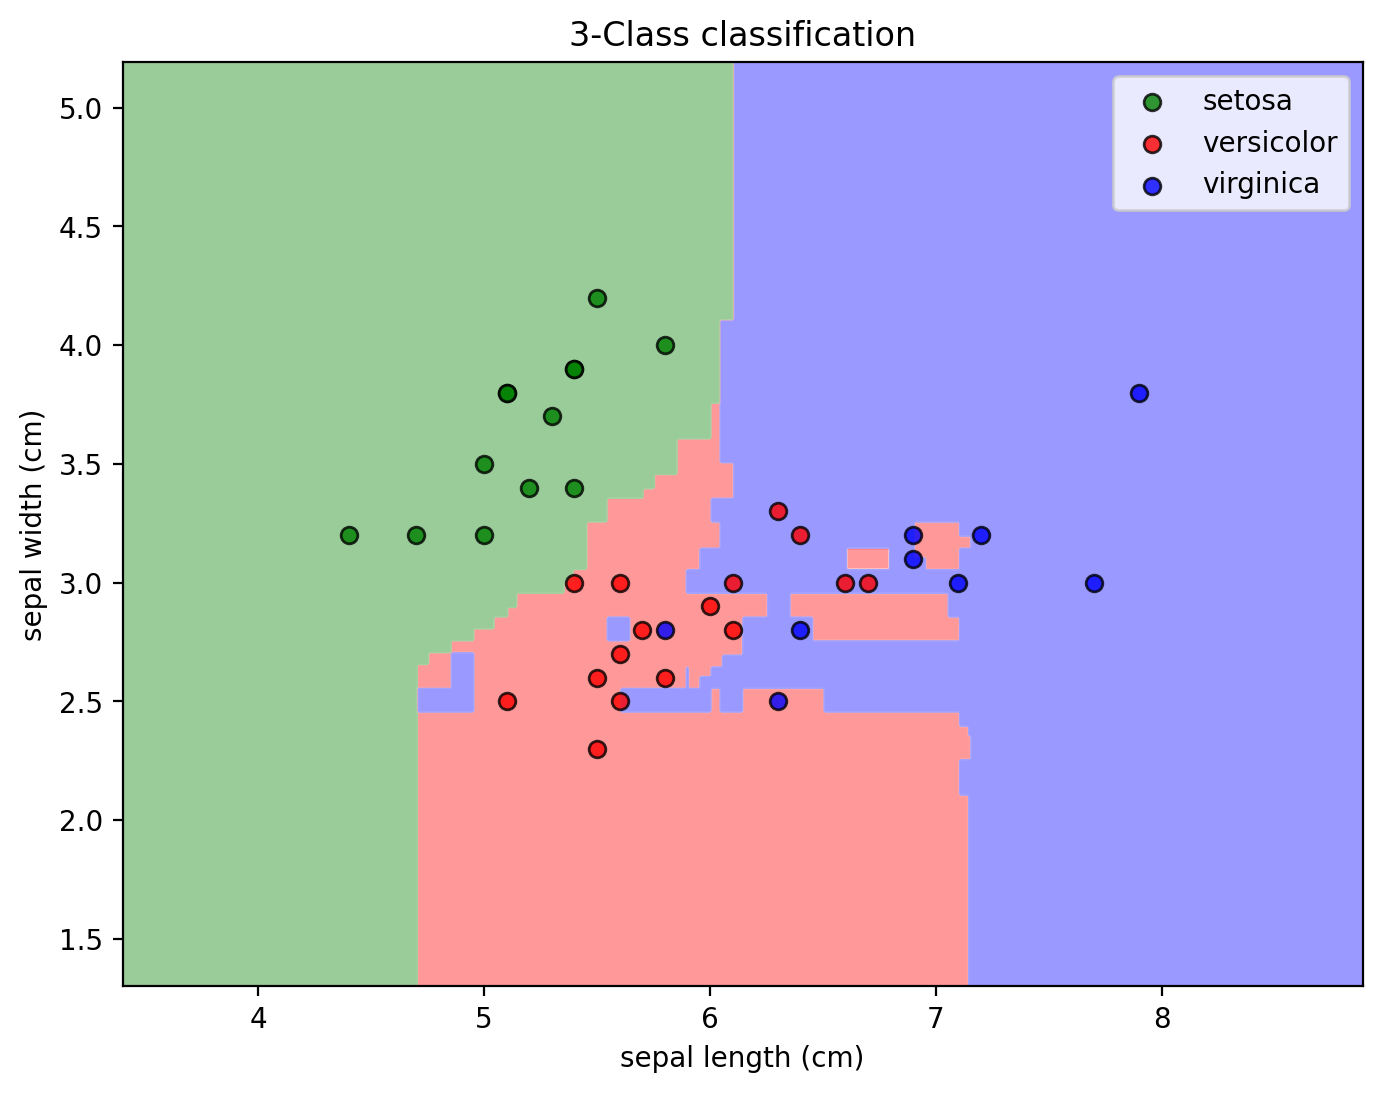

In [32]:
plot_decision_boundary(xs_2d_test, model, COLORS, HOP)
plot_training_points(xs_2d_test, ys_test, COLORS, features)

## Exercise 2

* Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to all features (there are 4) of the Iris dataset

* Give the ratio of the variance explained by each of the selected components, as well as their cumulative sum

* Apply one of the previous classifiers to the first two principal components

* Compare the quality of the predictions between those obtained with the first two principal components and those obtained with the first 2 features (Exercise 1)

**Note**

*   To avoid data leakage, and since the **test set** is supposed to represent unseen data
*   The PCA needs to be fit only on the **training set**
*   And, for obvious compatibility reasons, it should be applied to both **sets**

<span style="color:red">Implement your solution below</span>

In [33]:
xs_train, xs_test, ys_train, ys_test = train_test_split(
    iris.data, ys, random_state=1
)

In [34]:
from sklearn.decomposition import PCA

N_COMP = 2

pca = PCA(n_components=N_COMP)

# Learn the pca model to the training set and apply the model to it
xps_train = pca.fit_transform(xs_train)

# Apply the model to the test set
xps_test = pca.transform(xs_test)

In [35]:
with np.printoptions(precision=3):
    print(pca.explained_variance_ratio_)

[0.93  0.046]


In [36]:
with np.printoptions(precision=3):
    print(pca.explained_variance_ratio_.cumsum())

[0.93  0.976]


In [37]:
# 1. Model choice (import)
from sklearn.svm import SVC

# 2. Instantiation
model = SVC()

# 3. Learn (fit) the model
model.fit(xps_train, ys_train)

# 4. Predict on new data
yps_pred = model.predict(xps_test)

In [38]:
score = metrics.accuracy_score(ys_test, yps_pred)
print(f"{score :.03f}")

0.974


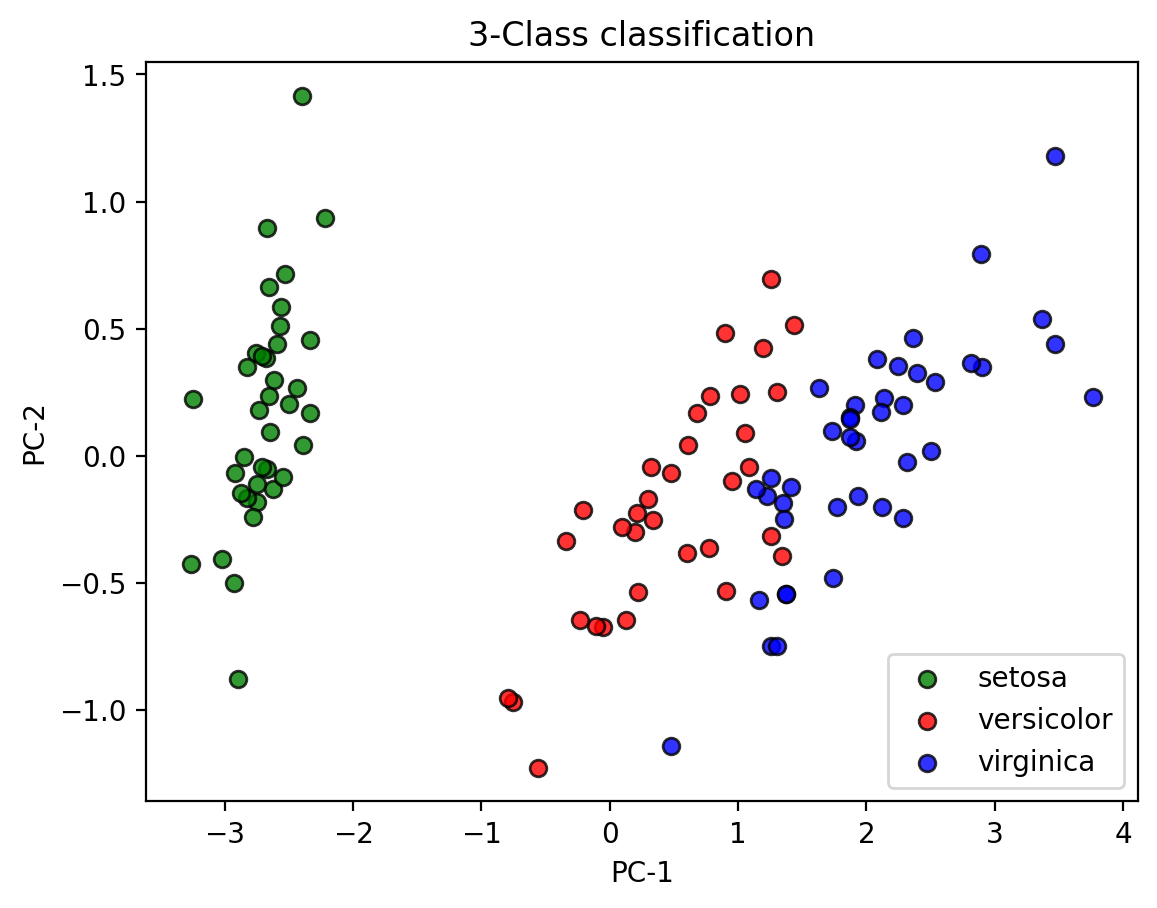

In [39]:
plot_training_points(xps_train, ys_train, COLORS, ["PC-1", "PC-2"])

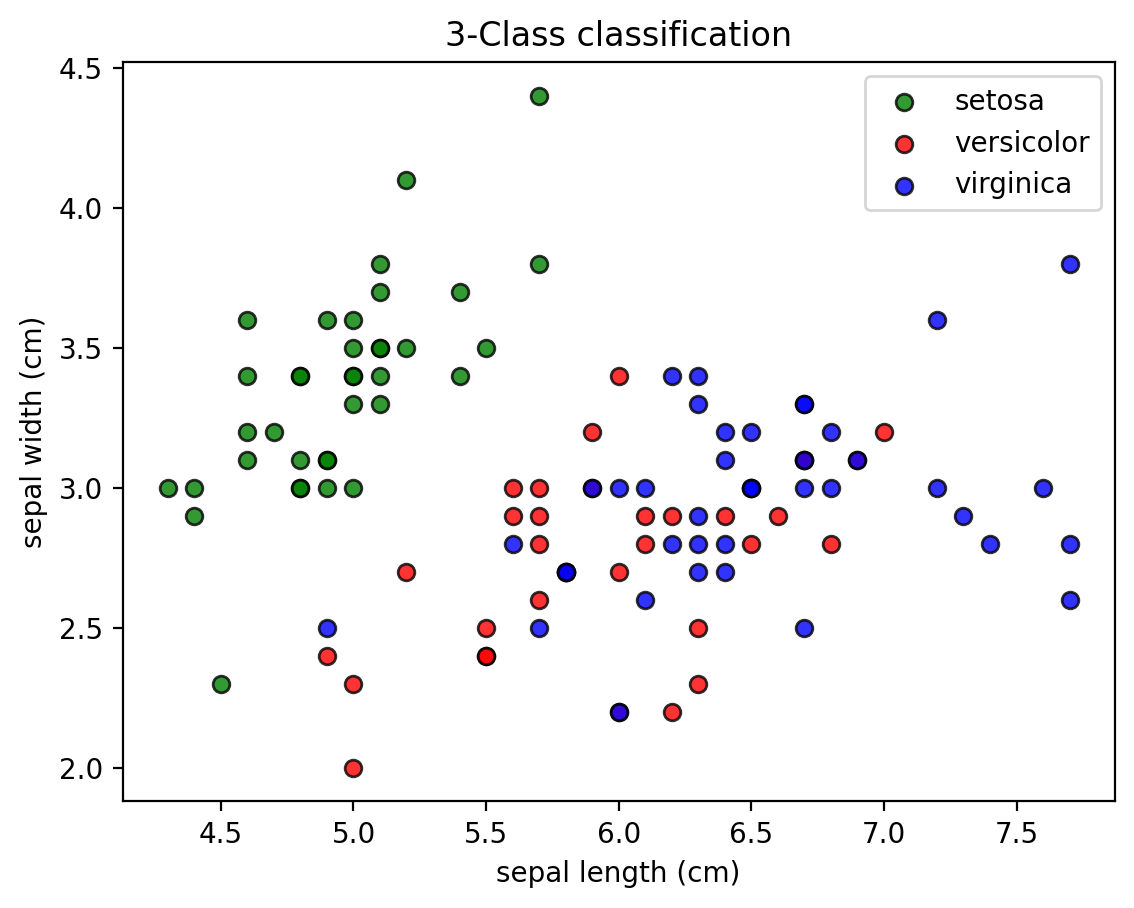

In [40]:
plot_training_points(xs_train, ys_train, COLORS, features)

We see that the PCA allows better visual discrimination between the different classes.

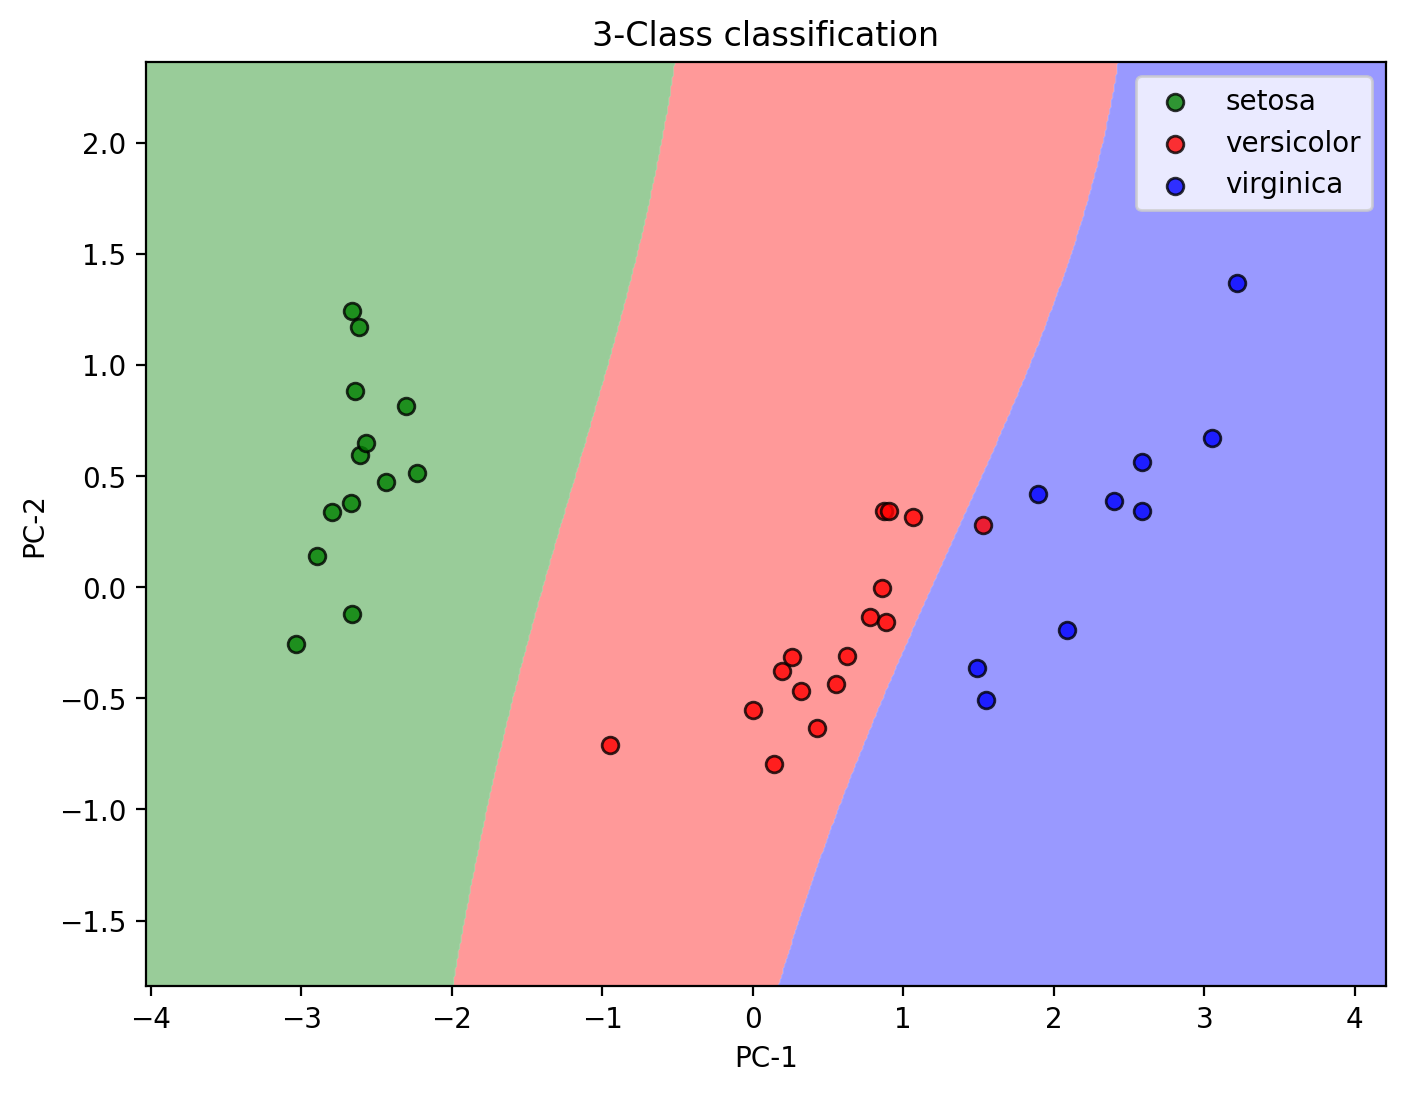

In [41]:
plot_decision_boundary(xps_test, model, COLORS, HOP)
plot_training_points(xps_test, ys_test, COLORS, ["PC-1", "PC-2"])

As expected, the separation into classes is better with the classifier applied to the first 2 principal components, rather than to the first 2 features.

We can even use only the first principal component (which moreover explains 95% of the variance of the features) to obtain a classification showing the same performance.

---